In [1]:
import pandas as pd
import sweetviz
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as ex

# Ignorar todos los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Lectura e informacion de los datos**
---

In [2]:
data=pd.read_csv('../../Data/Raw/bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,1,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,0,unknown,5,may,198,1,-1,0,unknown,no


Vemos las columnas de las que disponemos, el tipo de dato que tienen asociado y el numero de valores no-nulos.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   car         49643 non-null  object
 9   contact     49732 non-null  object
 10  day         49732 non-null  int64 
 11  month       49732 non-null  object
 12  duration    49732 non-null  int64 
 13  campaign    49732 non-null  int64 
 14  pdays       49732 non-null  int64 
 15  previous    49732 non-null  int64 
 16  poutcome    49732 non-null  object
 17  subscribed  49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.8+ MB


# Análisis estadístico de los datos


In [4]:
print(data.nunique())

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
car              3
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64


La variable balance se corresponde con el saldo promedio anual, deberiamos agruparlo en intervalos, para evitar el efecto de los outliers y procedemos de la misma manera con la variable duration y pdays.

## a) Descriptive stactistics

Disponemos de 49.732 observaciones con 18 Atributos (Variables).

In [5]:
data.shape

(49732, 18)

## Descripción de la variable objetivo

Estudiemos la estructura y características de la variable objetivo 'subscribed'. Esta puede tomar dos valores 'yes' o 'no'.

Clasificacion de observacion en la variable objetivo ( subscribed)
--------------------------------------------------
no     43922
yes     5810
Name: subscribed, dtype: int64

 Gráfico
--------------------------------------------------


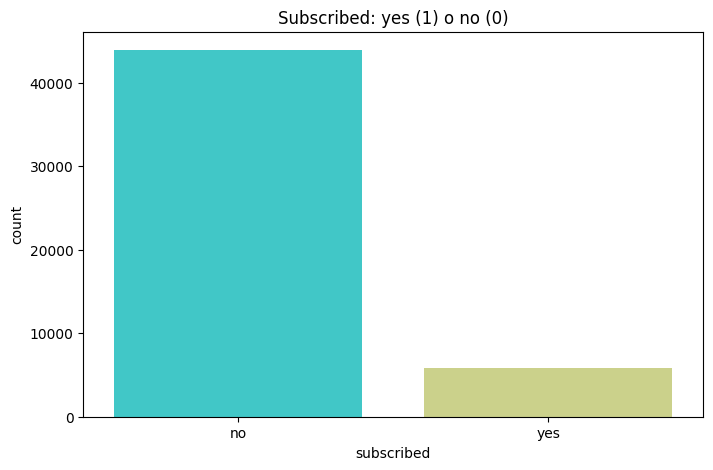

In [6]:
print('Clasificacion de observacion en la variable objetivo ( subscribed)')
print('-'*50)
print(data['subscribed'].value_counts())
print('\n Gráfico')
print('-'*50)
plt.figure(figsize=(8,5))
sns.countplot(x='subscribed',data=data, palette='rainbow')
plt.title("Subscribed: yes (1) o no (0)")
plt.show()

Falta unir grafico anterior con quesito

In [7]:
fig = ex.pie(data,names='subscribed')
fig.update_layout(title='Proporción de observaciones de cada clase (0, 1)')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

La muestra está un poco desbalanceada. Deberemos emplear técncias de oversampling para poder realizar redicciones precisas.

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


En esta descripción sólo aparecen aquellas variables que son numéricas.
Para tratar las categóricas tenemos que hacerlo de forma distinta.


In [9]:
cat=[] #variables categóricas
num=[] #variables numéricas
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'car', 'contact', 'month', 'poutcome', 'subscribed']
num =  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


## Descripción de las variables numéricas (boxplot)

Hacemos un boxplot para analizar gráficamente los valores de las variables numéricas.

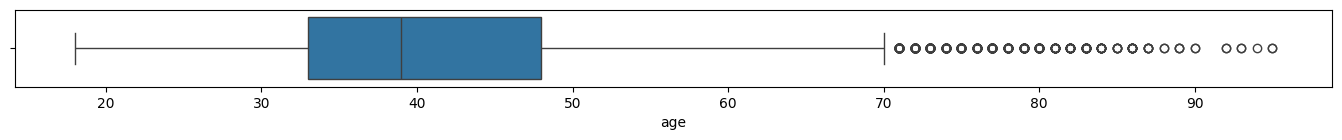

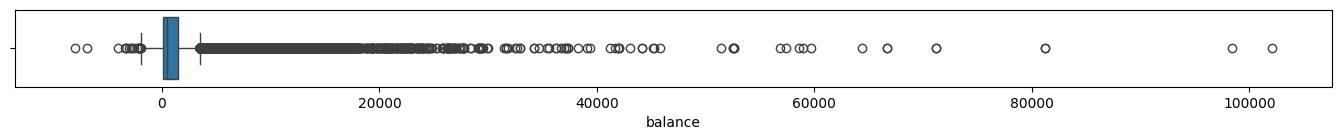

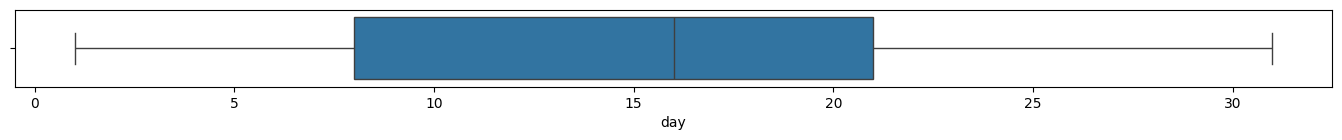

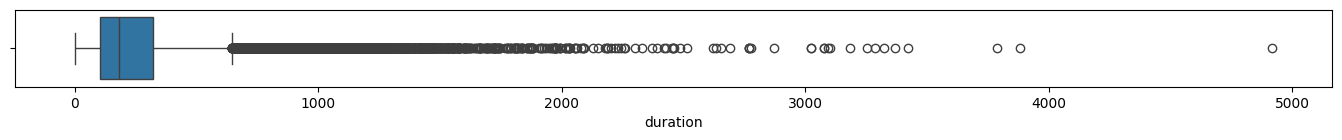

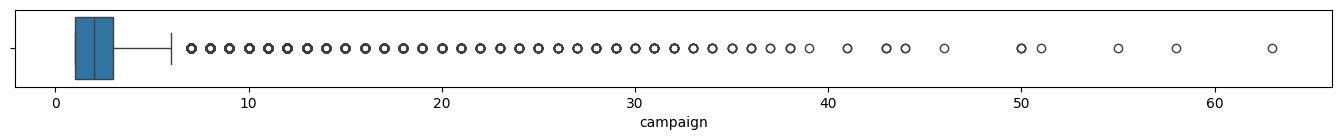

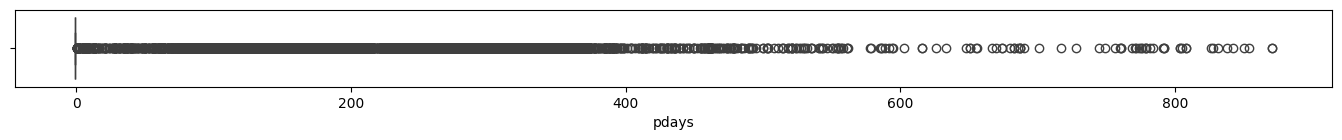

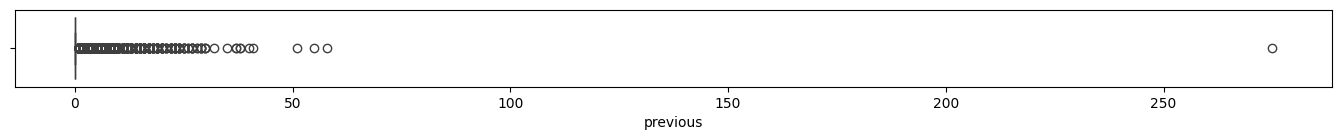

In [10]:
for column in data[num]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data[num], x=column)

Análisis de los Boxplots
Age:vemos que hay un grupo de personas mayores de 70 años que los consiedera outliers, aunque sin llegar a ser un número representativo de la muestra. Parece una variable con una ligera asimetría a la derecha.
Balance: se puede ver que hay una gran cantidad de datos atípicos (saldos bastante elevados), aunque la gran mayoria de clientes presentan saldos muy similares.
Day: vemos que es una distribución bastante simétrica y nos informa que los clientes suelen ser contactados durante la quincena central del mes.
Duration: presenta bastantes valores atípicos. Como norma general tiempo de cada llamada no supera los 10 min.
Campaign: presenta pocos valores atípicos. Se observa que no se suele contactar con un cliente más de 5 veces durante la campaña actual.
Pdays: a primera vista es un gráfico que llama bastante la atención. Todos los valores de la caja coinciden con 0. Viendo ahora el significado de esta variable, nos damos cuenta que el motivo puede ser que la gran mayoría de clientes nunca han sido contactados en la campaña anterior.
Previous: comentario similar al anterior.


Análisis boxplot
Age:
Balance:
Day:
Duration:
Campaign:
Pdays:
Previous:

Fonsi comenta estos graficos

Ahora hacemos un análisis descritivo de las variables categóricas de la misma forma que lo hemos hecho para la variable objetivo.

## Descripción de las variables categóricas


Descripcion de la variable  job
--------------------------------------------------
Categorías:
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64
Número de categorias:  12


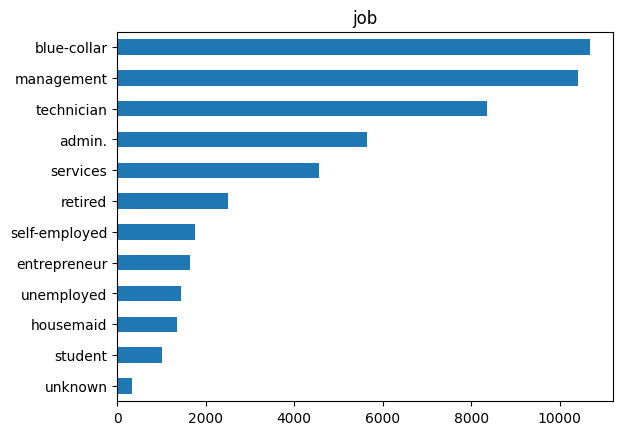


Descripcion de la variable  marital
--------------------------------------------------
Categorías:
married     30011
single      13986
divorced     5735
Name: marital, dtype: int64
Número de categorias:  3


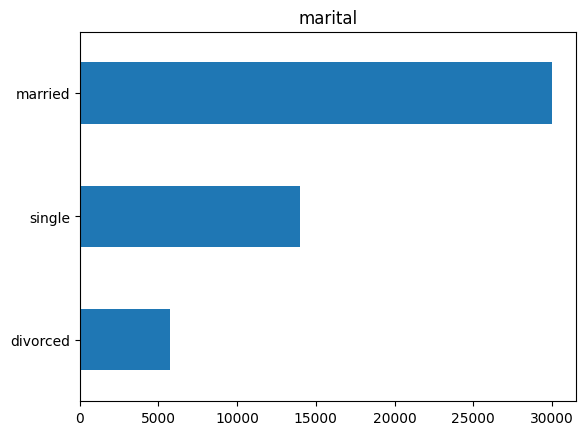


Descripcion de la variable  education
--------------------------------------------------
Categorías:
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64
Número de categorias:  4


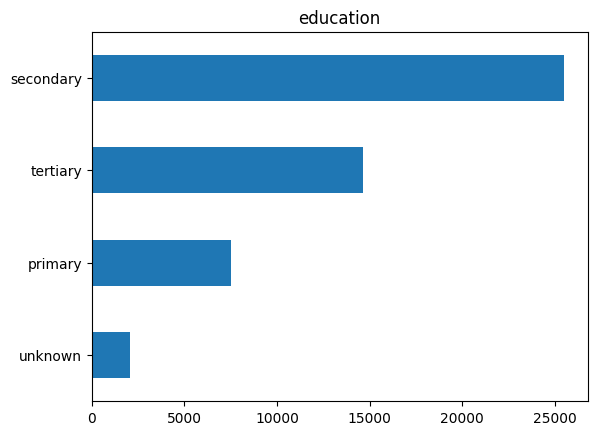


Descripcion de la variable  default
--------------------------------------------------
Categorías:
no     48841
yes      891
Name: default, dtype: int64
Número de categorias:  2


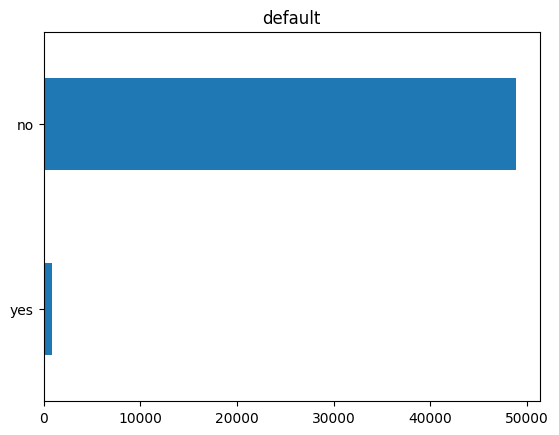


Descripcion de la variable  housing
--------------------------------------------------
Categorías:
yes    27689
no     22043
Name: housing, dtype: int64
Número de categorias:  2


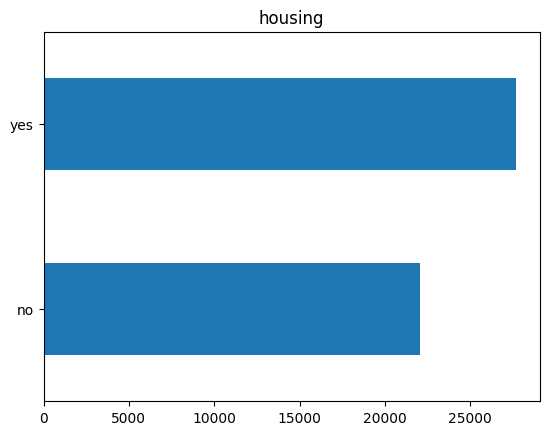


Descripcion de la variable  loan
--------------------------------------------------
Categorías:
no     41797
yes     7935
Name: loan, dtype: int64
Número de categorias:  2


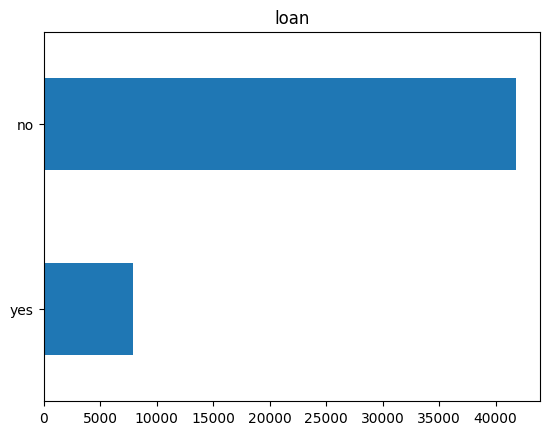


Descripcion de la variable  car
--------------------------------------------------
Categorías:
1          29982
0          13946
unknown     5715
Name: car, dtype: int64
Número de categorias:  3


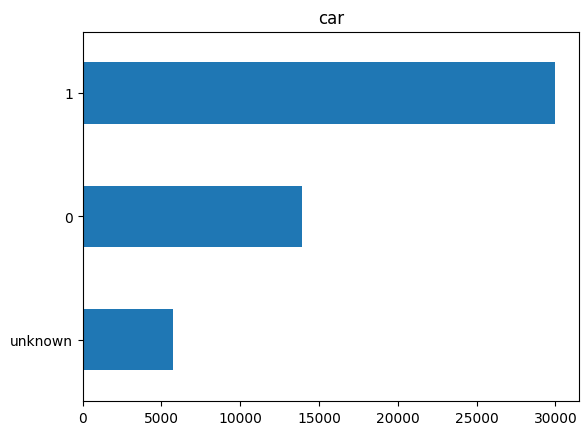


Descripcion de la variable  contact
--------------------------------------------------
Categorías:
cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64
Número de categorias:  3


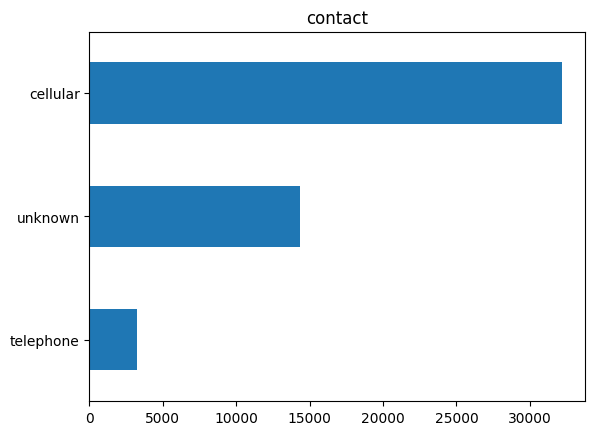


Descripcion de la variable  month
--------------------------------------------------
Categorías:
may    15164
jul     7601
aug     6880
jun     5872
nov     4359
apr     3225
feb     2871
jan     1551
oct      818
sep      631
mar      526
dec      234
Name: month, dtype: int64
Número de categorias:  12


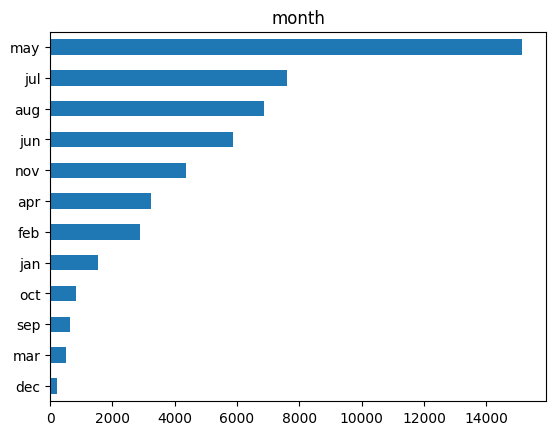


Descripcion de la variable  poutcome
--------------------------------------------------
Categorías:
unknown    40664
failure     5391
other       2037
success     1640
Name: poutcome, dtype: int64
Número de categorias:  4


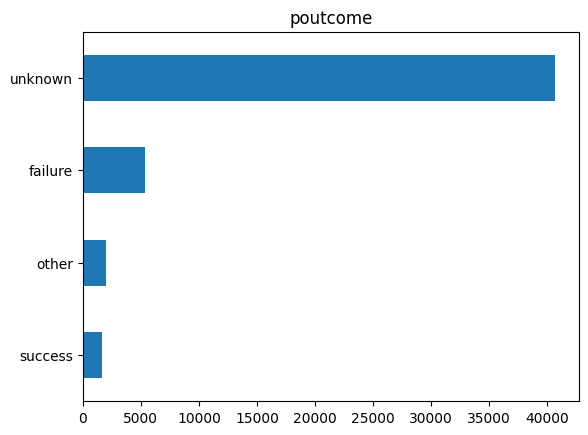


Descripcion de la variable  subscribed
--------------------------------------------------
Categorías:
no     43922
yes     5810
Name: subscribed, dtype: int64
Número de categorias:  2


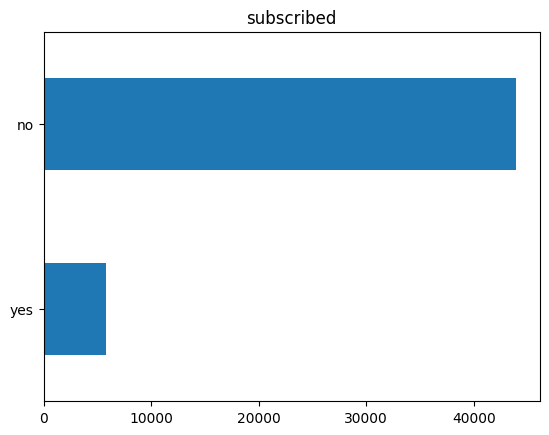

In [11]:
for i in data.columns: # bucle para todas las columnas del dataframe
    if data[i].dtypes == 'object': #condición que debe cumplirse (que sean del tipo 'object')
        print('\nDescripcion de la variable ',i)
        print('-'*50)
        print('Categorías:')
        print(data[i].value_counts())
        print('Número de categorias: ',data[i].nunique())
        data[i].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
        plt.title(i)
        plt.show()


Separamos las variables predictoras de la variable objetivo.

In [12]:
X = data[list(data.columns[1:data.shape[1]])] #todas las variables menos la variable respuesta
y = data['subscribed']

## Mátriz de correlacion de las variables numéricas

<Axes: >

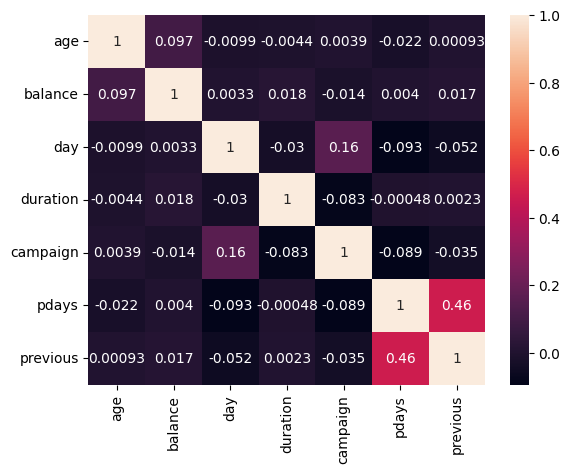

In [13]:
sns.heatmap(data[num].corr(),annot=True)

## Distribución de las variables numéricas (histogramas)

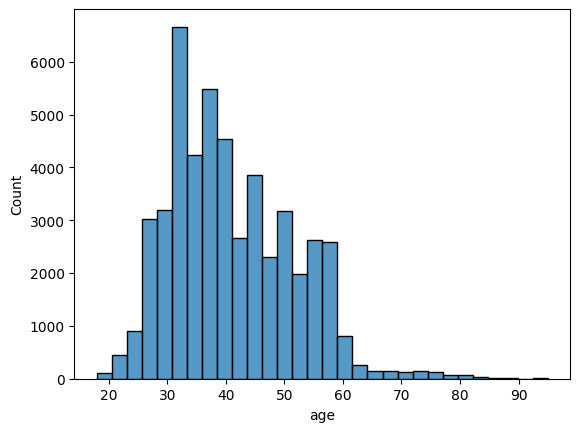

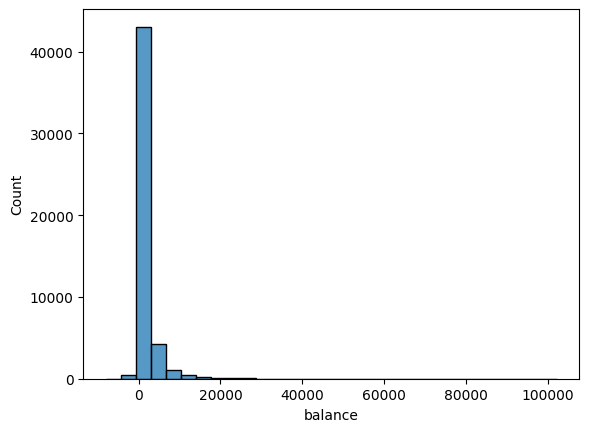

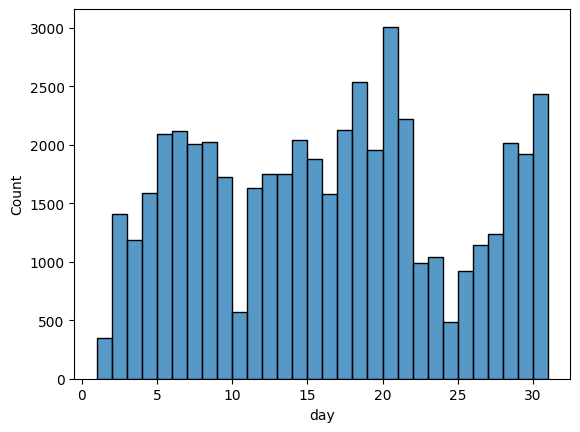

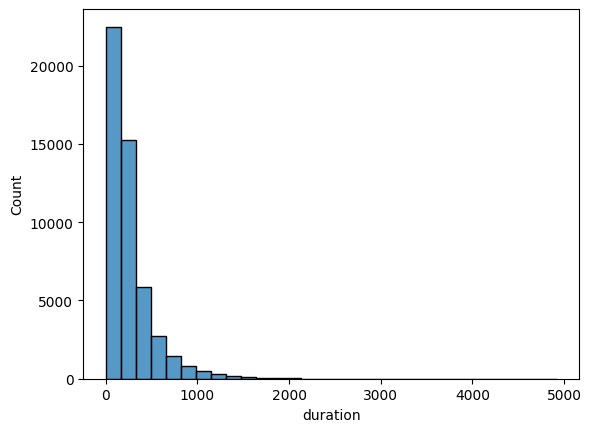

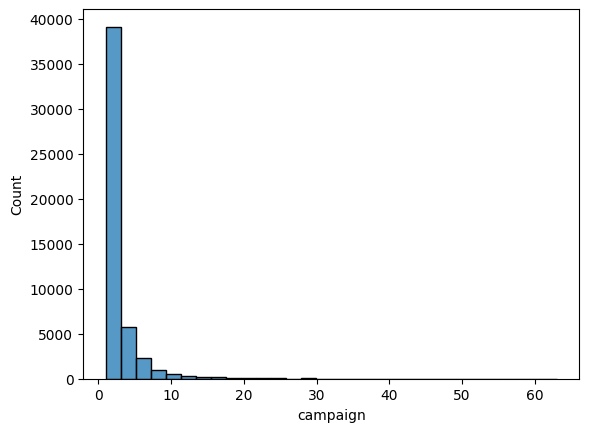

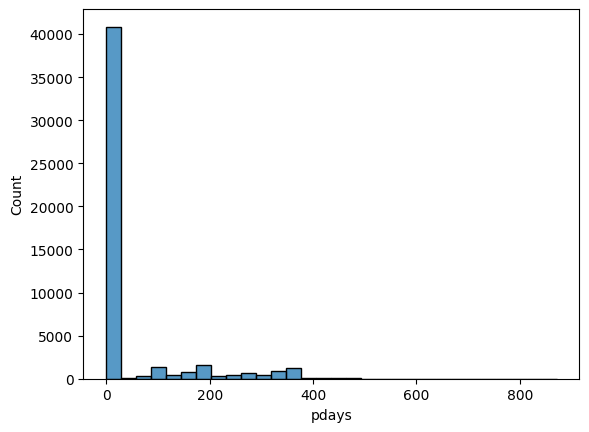

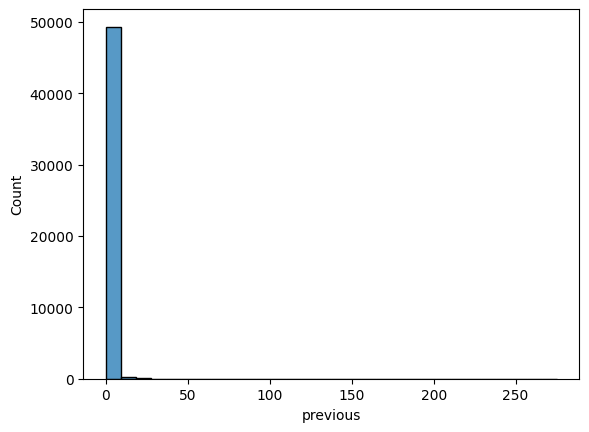

In [14]:
for n in num:
    sns.histplot(x=n,data=data,bins=30)
    plt.show()

Interpretacion de los histogramas:
- **Age** : Se asemeja a una distribución normal
- **Balance** : Hay que agrupar en intervalos
- **Day** : Podría ser interesante sustituir los valores numéricos por dia de la semana (Lunes, Martes...)
- **Duration, Campaign, pdays, previous**  : Se observa la presencia de outliers

## Diagramas de dispersion

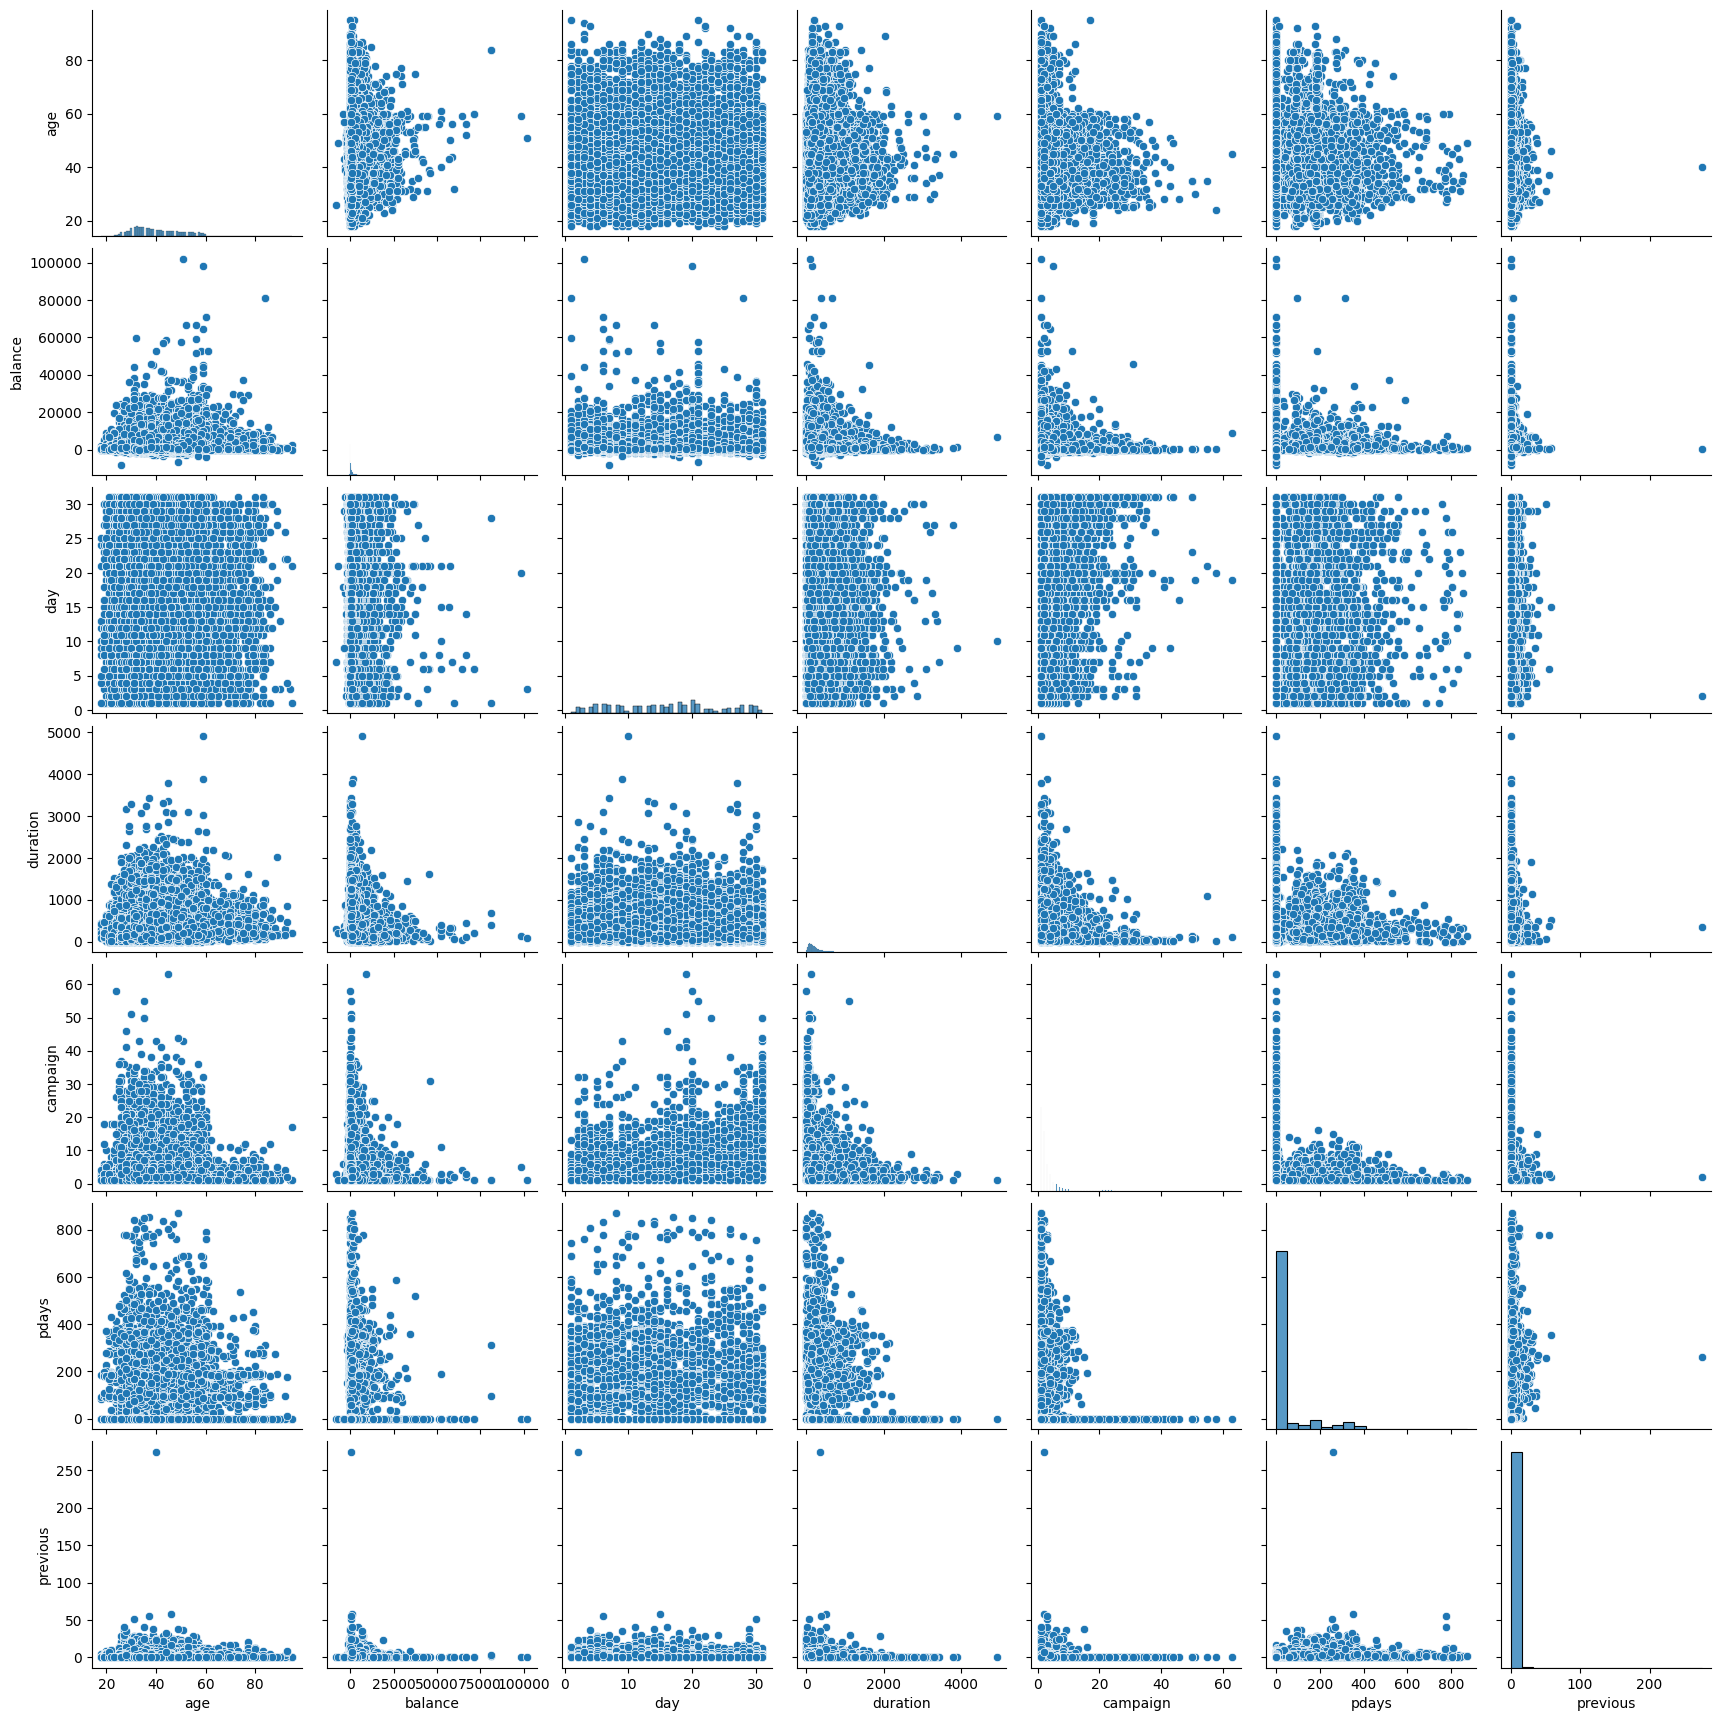

In [15]:
sns.pairplot(data[num])

## Valores nulos

In [16]:
print('Columnas con valores nulos: ')
data.isna().sum() /len(data)

Columnas con valores nulos: 


age           0.00000
job           0.00000
marital       0.00000
education     0.00000
default       0.00000
balance       0.00000
housing       0.00000
loan          0.00000
car           0.00179
contact       0.00000
day           0.00000
month         0.00000
duration      0.00000
campaign      0.00000
pdays         0.00000
previous      0.00000
poutcome      0.00000
subscribed    0.00000
dtype: float64

Observando que tenemos un 0,18% de nulos en la columna car y que además se trata de una variable categórica binaria, consideramos que eliminar dichos valores seria la opcion adecuada.

## B) Data Cleaning

In [17]:
### Clean balance Column

balance_min = data['balance'].min()
balance_q1 = data['balance'].quantile(0.25)
balance_q2 = data['balance'].quantile(0.5)
balance_q3 = data['balance'].quantile(0.75)
balance_max = data['balance'].max()

print("Min:", balance_min)
print("Q1 (25th percentile):", balance_q1)
print("Q2 (50th percentile):", balance_q2)
print("Q3 (75th percentile):", balance_q3)
print("Max:", balance_max)

Min: -8019
Q1 (25th percentile): 72.0
Q2 (50th percentile): 448.0
Q3 (75th percentile): 1431.0
Max: 102127


Se propone crear los siguientes buckets
1. Negativo
2. Entre 0 inclusivo y 500 exclusivo
3. Entre 500 inclusivo y 1000 exclusivo
4. Entre 1000 inclusivo y 1500  Exclusivo
5. Mas de 1500 


In [18]:
conditions = [
    data['balance'] < 0,
    (data['balance'] >= 0) & (data['balance'] < 100),
    (data['balance'] >= 100) & (data['balance'] < 500),
    (data['balance'] >= 500) & (data['balance'] < 1000),  
    (data['balance'] >= 1000) & (data['balance'] < 1500),  
    (data['balance'] >= 1500)
]

choices = ['negativo', '0-100', '100-500','500-1000', '1000-1500', ' > 1500'] 

data['balance'] = np.select(conditions, choices, default='Other')

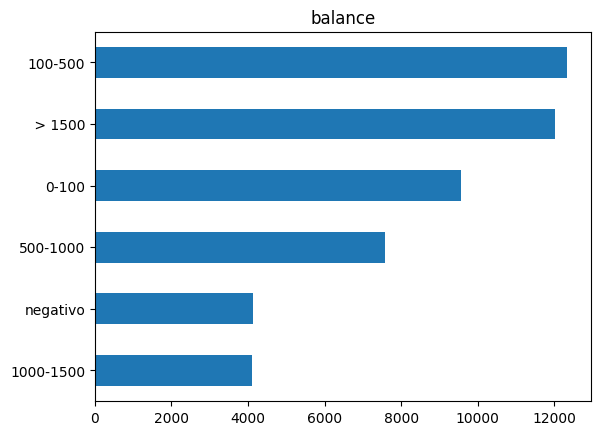

In [19]:
data["balance"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("balance")
plt.show()

In [20]:
### Clean Duration

duration_min = data['duration'].min()
duration_q1 = data['duration'].quantile(0.25)
duration_q2 = data['duration'].quantile(0.5)
duration_q3 = data['duration'].quantile(0.75)
duration_max = data['duration'].max()

print("Min:", duration_min)
print("Q1 (25th percentile):", duration_q1)
print("Q2 (50th percentile):", duration_q2)
print("Q3 (75th percentile):", duration_q3)
print("Max:", duration_max)


Min: 0
Q1 (25th percentile): 103.0
Q2 (50th percentile): 180.0
Q3 (75th percentile): 320.0
Max: 4918


In [21]:
# Se recalcula la variable a minutos
data['duration'] = data['duration']/60

In [22]:
duration_min = data['duration'].min()
duration_q1 = data['duration'].quantile(0.25)
duration_q2 = data['duration'].quantile(0.5)
duration_q3 = data['duration'].quantile(0.75)
duration_max = data['duration'].max()

print("Min:", duration_min)
print("Q1 (25th percentile):", duration_q1)
print("Q2 (50th percentile):", duration_q2)
print("Q3 (75th percentile):", duration_q3)
print("Max:", duration_max)

Min: 0.0
Q1 (25th percentile): 1.7166666666666666
Q2 (50th percentile): 3.0
Q3 (75th percentile): 5.333333333333333
Max: 81.96666666666667


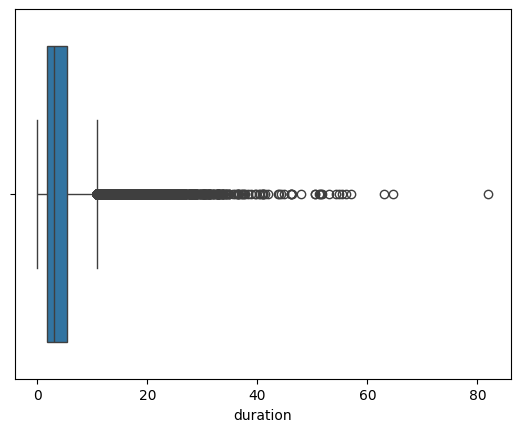

In [23]:
sns.boxplot(data=data, x="duration")
plt.show()

Se propone crear los siguientes buckets
1. Menos de 5 minutos inclusivo
2. Entre 5 exclusivo y 10 minutos inclusivo
3. Mas de 10 minutos


In [24]:
conditions = [
    (data['duration'] >= 0) & (data['duration'] < 5),
    (data['duration'] >= 5) & (data['duration'] < 10),
    (data['duration'] > 10)
]

choices = ['<5', '5 - 10', '10>0 '] 

data['duration'] = np.select(conditions, choices, default='Other')

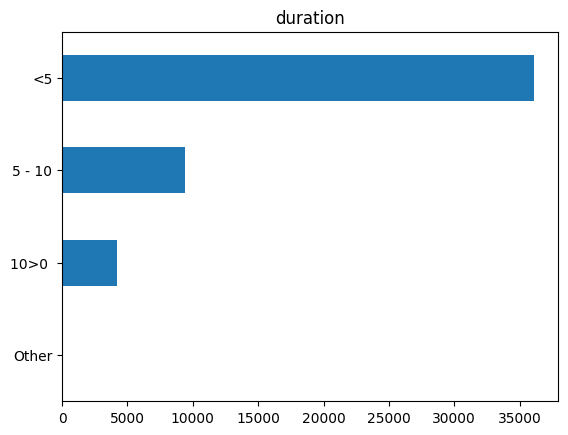

In [25]:
data["duration"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("duration")
plt.show()

In [26]:
# Clean Pdays

pdays_min = data['pdays'].min()
pdays_q1 = data['pdays'].quantile(0.25)
pdays_q2 = data['pdays'].quantile(0.5)
pdays_q3 = data['pdays'].quantile(0.75)
pdays_max = data['pdays'].max()

print("Min:", duration_min)
print("Q1 (25th percentile):", pdays_q1)
print("Q2 (50th percentile):", pdays_q2)
print("Q3 (75th percentile):", pdays_q3)
print("Max:", pdays_max)


Min: 0.0
Q1 (25th percentile): -1.0
Q2 (50th percentile): -1.0
Q3 (75th percentile): -1.0
Max: 871


In [27]:
# Se hace una variable boolean 1 si fue contactado 0 si no fue contactado

data['pdays'] = np.where(data['pdays'] == -1, 0, 1)

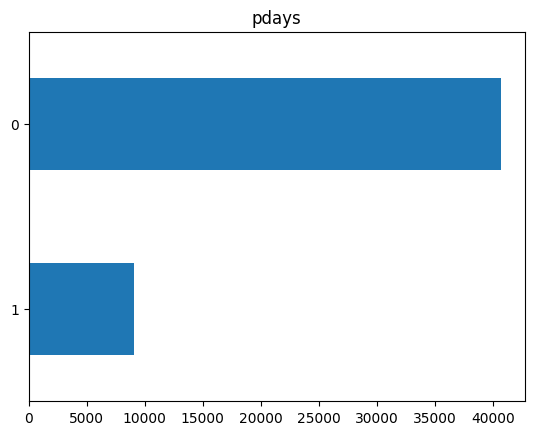

In [28]:
data["pdays"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("pdays")
plt.show()

In [29]:
# Clean Previous

previous_min = data['previous'].min()
previous_q1 = data['previous'].quantile(0.25)
previous_q2 = data['previous'].quantile(0.5)
previous_q3 = data['previous'].quantile(0.75)
previous_max = data['previous'].max()

print("Min:", previous_min)
print("Q1 (25th percentile):", previous_q1)
print("Q2 (50th percentile):", previous_q2)
print("Q3 (75th percentile):", previous_q3)
print("Max:", previous_max)


Min: 0
Q1 (25th percentile): 0.0
Q2 (50th percentile): 0.0
Q3 (75th percentile): 0.0
Max: 275


In [30]:
# Crear boolean, si previous es 0 entonces no fue contactado, de otra manera utilizar un 1
data['previous'] = np.where(data['previous'] == 0, 0, 1)

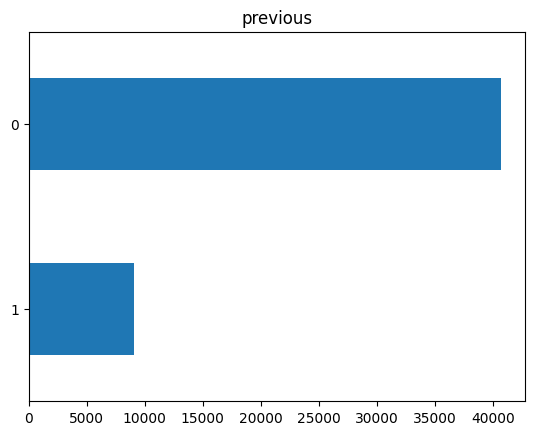

In [31]:
data["previous"].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
plt.title("previous")
plt.show()

In [32]:
# Remove observations where car is missing



In [33]:
cat=[]
num=[]
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'car', 'contact', 'month', 'duration', 'poutcome', 'subscribed']
num =  ['age', 'day', 'campaign', 'pdays', 'previous']


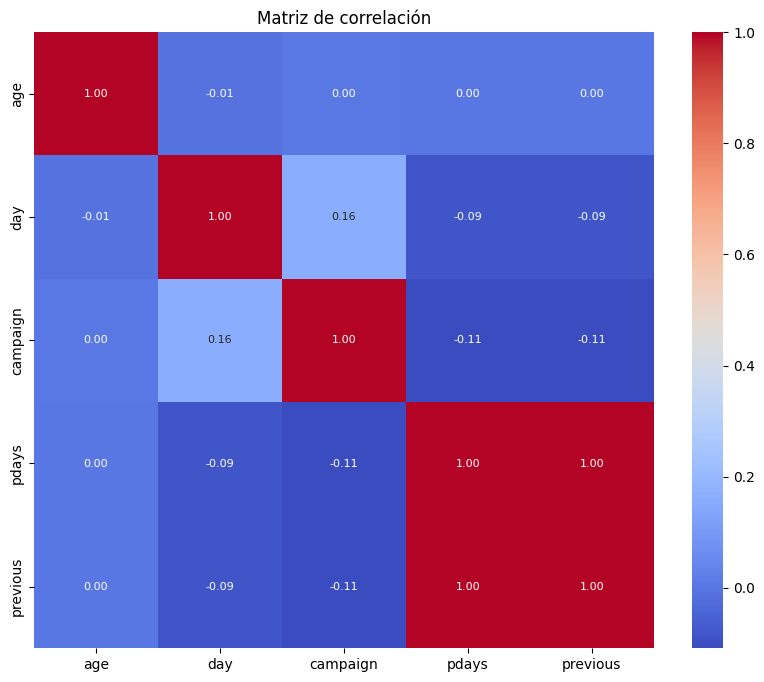

In [34]:
# Calcular la matriz de correlación
correlation_matrix = data[num].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de correlación')
plt.show()

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_data = data[num]

def estandariza(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

In [36]:
dfvif_estan = numeric_data.apply(estandariza, axis=0)
dfvif_estan.head()

,age,day,campaign,pdays,previous
0,1.605513,-1.300713,-0.570025,-0.472381,-0.472381
1,0.286625,-1.300713,-0.570025,-0.472381,-0.472381
2,-0.749644,-1.300713,-0.570025,-0.472381,-0.472381
3,0.569244,-1.300713,-0.570025,-0.472381,-0.472381
4,-0.749644,-1.300713,-0.570025,-0.472381,-0.472381


In [37]:
vif_estan = [[dfvif_estan.columns[i], variance_inflation_factor(dfvif_estan.to_numpy(), i)] for i in range(numeric_data.shape[1])]
df_vif_estan=pd.DataFrame(vif_estan)
df_vif_estan=df_vif_estan.rename(columns = {0:'Variable',1:'VIF'})
df_vif_estan

/Users/mariolamas/anaconda3/envs/entorno_prueba/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



,Variable,VIF
0,age,1.000132
1,day,1.032070
2,campaign,1.036781
3,pdays,inf
4,previous,inf


In [38]:
data

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,> 1500,yes,no,1,unknown,5,may,<5,1,0,0,unknown,no
1,44,technician,single,secondary,no,0-100,yes,no,0,unknown,5,may,<5,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,0-100,yes,yes,1,unknown,5,may,<5,1,0,0,unknown,no
3,47,blue-collar,married,unknown,no,> 1500,yes,no,1,unknown,5,may,<5,1,0,0,unknown,no
4,33,unknown,single,unknown,no,0-100,no,no,0,unknown,5,may,<5,1,0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,negativo,yes,no,1,cellular,30,jul,5 - 10,5,0,0,unknown,no
49728,57,self-employed,married,tertiary,yes,negativo,yes,yes,1,unknown,9,may,<5,1,0,0,unknown,no
49729,57,technician,married,secondary,no,100-500,no,no,1,cellular,19,aug,<5,11,0,0,unknown,no
49730,28,blue-collar,married,secondary,no,1000-1500,no,no,1,cellular,6,feb,<5,4,1,1,other,no


In [39]:
distinct_months = data['month'].unique()

# Mostrar los distintos valores de la columna 'month'
print("Distintos valores en la columna 'month':")
print(distinct_months)

Distintos valores en la columna 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [57]:
from datetime import datetime
meses_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Función para obtener el nombre del día de la semana
def get_weekday_name(day, month):
    # Asumimos que las fechas son del año 2020
    year = 2020
    month_num = meses_dict[month.lower()]  # Convierte el nombre del mes a número
    date_obj = datetime(year, month_num, day)
    return date_obj.strftime('%A')  # Devuelve el nombre completo del día de la semana

# Aplicar la función a las filas del DataFrame para crear la nueva columna 'dia_semana'
data['dia_semana'] = data.apply(lambda row: get_weekday_name(row['day'], row['month']), axis=1)

In [58]:
data

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,dia_semana
0,58,management,married,tertiary,no,> 1500,yes,no,1,unknown,5,may,<5,1,0,0,unknown,no,Tuesday
1,44,technician,single,secondary,no,0-100,yes,no,0,unknown,5,may,<5,1,0,0,unknown,no,Tuesday
2,33,entrepreneur,married,secondary,no,0-100,yes,yes,1,unknown,5,may,<5,1,0,0,unknown,no,Tuesday
3,47,blue-collar,married,unknown,no,> 1500,yes,no,1,unknown,5,may,<5,1,0,0,unknown,no,Tuesday
4,33,unknown,single,unknown,no,0-100,no,no,0,unknown,5,may,<5,1,0,0,unknown,no,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,negativo,yes,no,1,cellular,30,jul,5 - 10,5,0,0,unknown,no,Thursday
49728,57,self-employed,married,tertiary,yes,negativo,yes,yes,1,unknown,9,may,<5,1,0,0,unknown,no,Saturday
49729,57,technician,married,secondary,no,100-500,no,no,1,cellular,19,aug,<5,11,0,0,unknown,no,Wednesday
49730,28,blue-collar,married,secondary,no,1000-1500,no,no,1,cellular,6,feb,<5,4,1,1,other,no,Thursday


Frecuencia dia de la semana
--------------------------------------------------
Wednesday    9899
Thursday     9888
Tuesday      9561
Friday       8890
Saturday     6033
Monday       4111
Sunday       1350
Name: dia_semana, dtype: int64

 Gráfico
--------------------------------------------------


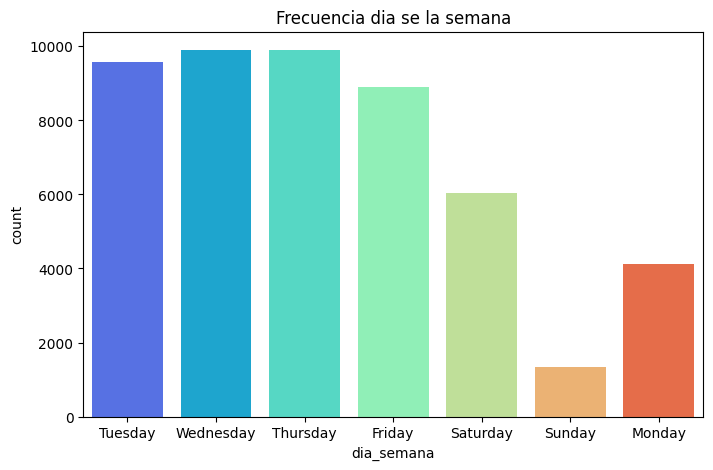

In [59]:
print('Frecuencia dia de la semana')
print('-'*50)
print(data['dia_semana'].value_counts())
print('\n Gráfico')
print('-'*50)
plt.figure(figsize=(8,5))
sns.countplot(x='dia_semana',data=data, palette='rainbow')
plt.title("Frecuencia dia se la semana")
plt.show()

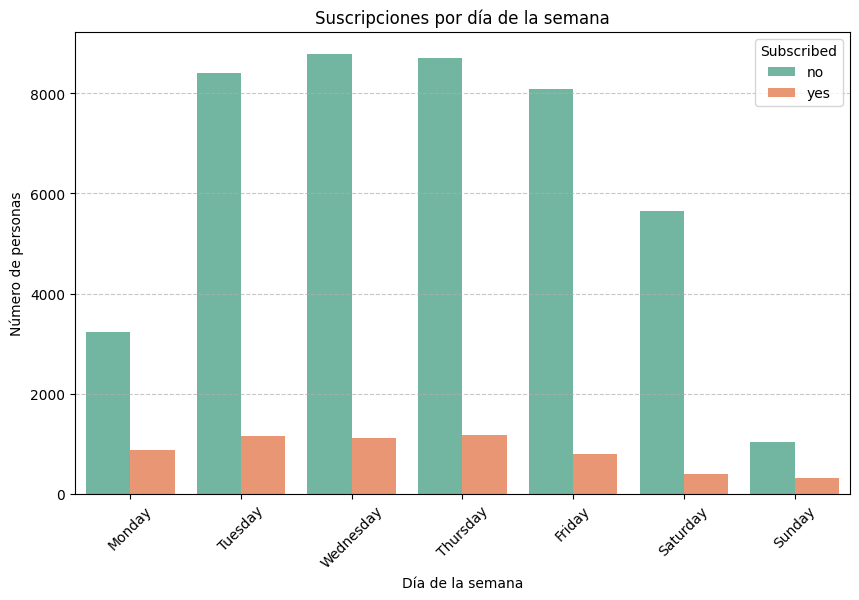

In [60]:
dias_semana_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reordenar los datos según el orden de los días de la semana
data['dia_semana'] = pd.Categorical(data['dia_semana'], categories=dias_semana_ordenados, ordered=True)

# Crear un gráfico de barras (count plot) usando seaborn
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
sns.countplot(data=data, x='dia_semana', hue='subscribed', palette='Set2')  # Crear el count plot
plt.title('Suscripciones por día de la semana')  # Definir el título del gráfico
plt.xlabel('Día de la semana')  # Etiqueta del eje x
plt.ylabel('Número de personas')  # Etiqueta del eje y
plt.legend(title='Subscribed', loc='upper right')  # Agregar leyenda
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula horizontal
plt.show()  # Mostrar el gráfico